In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_x = pd.read_csv('Data/logisticX.csv')
df_y = pd.read_csv('Data/logisticY.csv')

df_x = df_x.reset_index(drop=True)
df_y = df_y.reset_index(drop=True)

merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True)

In [6]:
X = np.genfromtxt('Data/logisticX.csv', delimiter=',')
y = np.genfromtxt('Data/logisticY.csv', delimiter=',')

In [7]:
merged_df.head()

,3.8915,4.2105,0
0,3.6898,6.6051,0
1,2.7763,7.5057,0
2,3.1137,5.7724,0
3,2.9251,5.4315,0
4,3.6699,6.4406,0


In [10]:
merged_df.columns = ['x', '','Dependent']
merged_df = merged_df.reset_index(drop=True)

# Display the updated dataframe
print(merged_df)

         x          Dependent
0   3.6898  6.6051          0
1   2.7763  7.5057          0
2   3.1137  5.7724          0
3   2.9251  5.4315          0
4   3.6699  6.4406          0
..     ...     ...        ...
94  5.7629  4.6161          1
95  4.1817  4.0577          1
96  6.3065  2.4776          1
97  5.6043  3.3146          1
98  7.0567  4.7346          1

[99 rows x 3 columns]


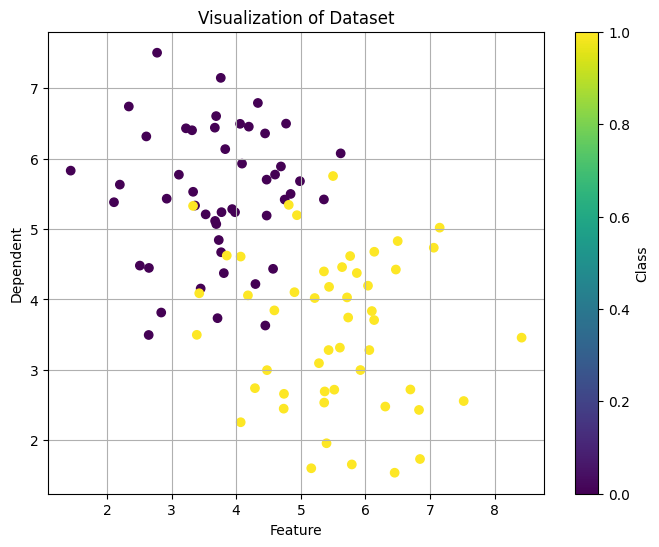

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['x'], merged_df[''], c=merged_df['Dependent'], cmap='viridis', marker='o')
plt.xlabel('Feature')
plt.ylabel('Dependent')
plt.title('Visualization of Dataset')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [11]:
# Standardize the independent variable
X = (X - X.mean()) / X.std()

In [12]:
# Add a bias term to the input features
X = np.c_[np.ones(X.shape[0]), X]

In [14]:
# necessary function to be kept under utils.py if needed

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -1 / m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient
        costs.append(cost_function(X, y, theta))

    return theta, costs

#### a) Use logistic regression to find decision boundary For the given database. Set your learning rate to 0.1. What is the cost function value and learning parameter value after convergence?

In [15]:
# parameters
theta_initial = np.zeros(X.shape[1])

# as per the assignment question
learning_rate = 0.1
iterations = 100

In [39]:
theta_final_0_1, costs = gradient_descent(X, y, theta_initial, learning_rate, iterations)

#### b) Cost function vs Iteration
as shown in -> https://pythonguides.com/matplotlib-plot-a-line/#Matplotlib_plot_a_line_chart

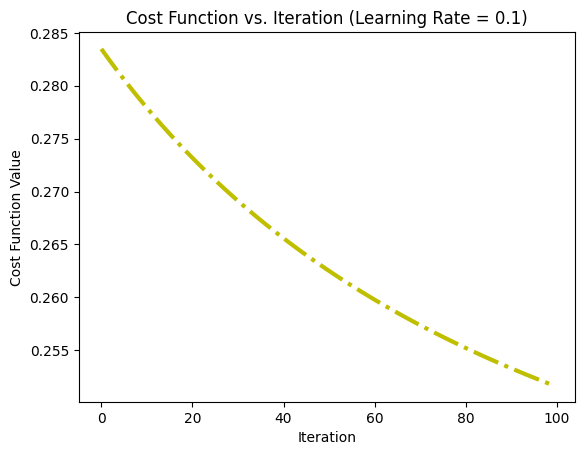

In [40]:
plt.plot(costs, 'y-.', linewidth=3)
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration (Learning Rate = 0.1)')
plt.show()

In [26]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    return m, b

#### c) Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you obtained in question 1. Do not use scatter plot.

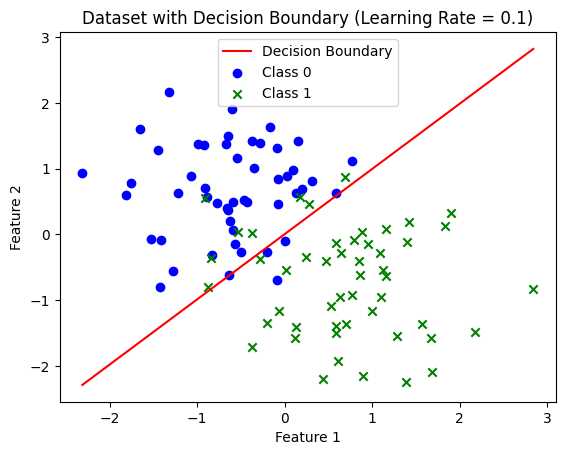

In [41]:
x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_values = -(theta_final_0_1[1] * x_values + theta_final_0_1[0]) / theta_final_0_1[2]

plt.plot(x_values, y_values, label='Decision Boundary', color='red')
plt.scatter(X[y == 0, 1], X[y == 0, 2], c='blue', label='Class 0', marker='o')  # Class 0 with circle marker
plt.scatter(X[y == 1, 1], X[y == 1, 2], c='green', label='Class 1', marker='x')  # Class 1 with cross marker
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary (Learning Rate = 0.1)')
plt.legend()
plt.show()

#### d) Train your model with a learning rate of 0.1 and 5. Plot the cost-function v/s iteration curve for both learning rates on the same graph. For this task, only train your model for 100 iterations.

Plotting using a learning rate of 0.1 has aldready been done in the above code block

In [43]:
# updated parameters
theta_initial = np.zeros(X.shape[1])

# as per the assignment question
learning_rate = 5
iterations = 100

In [45]:
updated_theta_final_5, updated_costs = gradient_descent(X, y, theta_initial, learning_rate, iterations)

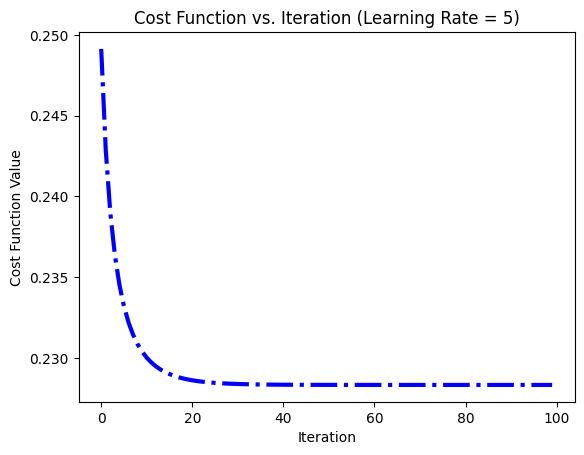

In [47]:
plt.plot(updated_costs, 'b-.', linewidth=3)
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration (Learning Rate = 5)')
plt.show()

#### Base comparison

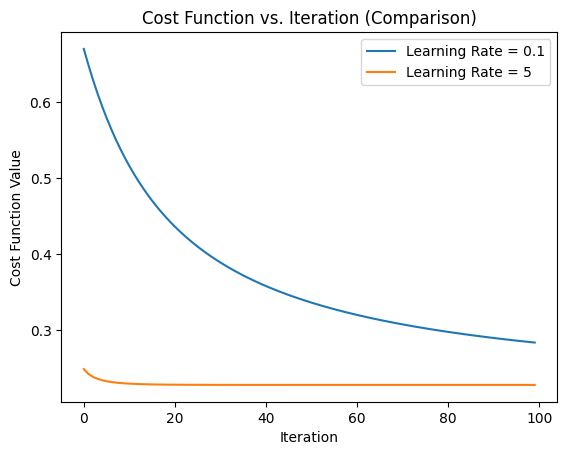

In [48]:
# Initialize parameters
theta_initial = np.zeros(X.shape[1])

# Set learning rate and number of iterations
learning_rate_5 = 5


theta_final_5, costs_5 = gradient_descent(X, y, theta_initial, learning_rate_5, iterations)

plt.plot(costs_0_1, label='Learning Rate = 0.1')
plt.plot(costs_5, label='Learning Rate = 5')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration (Comparison)')
plt.legend()
plt.show()

#### e) Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall, F1-score.

In [49]:
# Prediction using the final model using associated learning rates that is 0.1 and 5
y_pred_0_1 = (sigmoid(X.dot(theta_final_0_1)) >= 0.5).astype(int)

y_pred_5 = (sigmoid(X.dot(theta_final_5)) >= 0.5).astype(int)

In [51]:
# metric calculation for confusion matrix
# https://towardsdatascience.com/guide-to-confusion-matrices-classification-performance-metrics-a0ebfc08408e
def calculate_metrics(conf_matrix):
    tp, fp, fn, tn = conf_matrix.flatten()
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score

In [53]:
# Confusion matrix
conf_matrix_0_1 = np.array([[np.sum((y == 1) & (y_pred_0_1 == 1)), np.sum((y == 0) & (y_pred_0_1 == 1))],
                            [np.sum((y == 1) & (y_pred_0_1 == 0)), np.sum((y == 0) & (y_pred_0_1 == 0))]])

conf_matrix_5 = np.array([[np.sum((y == 1) & (y_pred_5 == 1)), np.sum((y == 0) & (y_pred_5 == 1))],
                          [np.sum((y == 1) & (y_pred_5 == 0)), np.sum((y == 0) & (y_pred_5 == 0))]])

In [54]:
accuracy_0_1, precision_0_1, recall_0_1, f1_score_0_1 = calculate_metrics(conf_matrix_0_1)
accuracy_5, precision_5, recall_5, f1_score_5 = calculate_metrics(conf_matrix_5)

#### Confusin matrix ->

In [58]:
print("Confusion Matrix for Learning Rate 0.1:")
print(conf_matrix_0_1)

print("\nConfusion Matrix for Learning Rate 5:")
print(conf_matrix_5)

Confusion Matrix for Learning Rate 0.1:
[[42  3]
 [ 8 47]]

Confusion Matrix for Learning Rate 5:
[[43  5]
 [ 7 45]]


In [59]:

print("Metrics for Learning Rate 0.1:")
print("Accuracy:", accuracy_0_1)
print("Precision:", precision_0_1)
print("Recall:", recall_0_1)
print("F1 Score:", f1_score_0_1)

print("\nMetrics for Learning Rate 5:")
print("Accuracy:", accuracy_5)
print("Precision:", precision_5)
print("Recall:", recall_5)
print("F1 Score:", f1_score_5)

Metrics for Learning Rate 0.1:
Accuracy: 0.89
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894

Metrics for Learning Rate 5:
Accuracy: 0.88
Precision: 0.8958333333333334
Recall: 0.86
F1 Score: 0.8775510204081632
